## Overhead Crane System

<p><strong>Objective:</strong> Design a model predictive controller for an overhead crane. Meet specific control objectives by tuning the controller and using the state space model of the crane system. Simulate and optimize the pendulum system with an adjustable overhead cart. <em>Estimated time: 2 hours.</em>
</p>
<p class='vspace'>A pendulum is described by the following dynamic equations:
</p>
<p class='vspace'>$$\begin{bmatrix} \dot y \\ \dot v \\ \dot \theta \\ \dot q \end{bmatrix}=\begin{bmatrix} 0 && 1 && 0 && 0\\ 0 && 0 && \epsilon && 0\\ 0 && 0 && 0 && 1\\ 0 && 0 && -1 && 0 \end{bmatrix} \begin{bmatrix} y \\ v \\ \theta \\ q \end{bmatrix} + \begin{bmatrix} 0 \\ 1 \\ 0 \\ -1 \end{bmatrix} u$$
</p>

* where $m_1=10$ is the mass of the cart, $m_2=1$ is the mass of the item carried, $\epsilon$ is $m_2/(m_1+m_2)$, $y$ is the position of the overhead cart, $v$ is the velocity of the overhead cart, $\theta$ is the angle of the pendulum relative to the cart, and $q$ is the rate of angle change.


![pendulum Crane](pendulum_crane.png)

<p class='vspace'>The objective of the controller is to adjust the force on the cart to move the pendulum mass to a new final position. Ensure that initial and final velocities and angles of the pendulum are zero. The position of the pendulum mass is initially at -1 and it is desired to move it to the new position of 0 within 6.2 seconds. Demonstrate controller performance with changes in the pendulum position and that the final pendulum mass remains at the final position without oscillation. How does the solution change if the mass of the item carried is increased to <em>m<sub>2</sub>=5</em>?</p>

apm 176.216.170.23_gk_model12 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 0.8.7
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :           10
   Intermediates:            0
   Connections  :            9
   Equations    :            1
   Residuals    :            1
 
 
 LTI Model Statistics
 -------------------------------------
 Sparse Matrices
 Continuous Form
 Matrix    Dimension    Non-zeros
   A                 4 x           4                 4
   B                 4 x           1                 2
   C                 4 x           4                 4
   D                 4 x           1                 0
   E                 4 x           4                 4
 -------------------------------------
 
 Number of state variables:           6

   3  6.6290301e+00 1.11e-16 5.01e-01  -2.9 4.45e-01    -  2.81e-01 1.00e+00f  1
   4  1.7515886e+00 2.22e-16 2.23e-01  -2.3 4.84e-01    -  5.67e-01 1.00e+00f  1
   5  7.7540765e-01 2.22e-16 1.15e-01  -2.7 9.71e-01    -  5.17e-01 1.00e+00f  1
   6  3.3450312e-01 2.22e-16 5.16e-02  -3.7 2.10e+00    -  5.10e-01 1.00e+00f  1
   7  2.9617827e-02 2.22e-16 3.29e-02  -2.9 3.09e+00    -  4.71e-01 1.00e+00f  1
   8  5.1795280e-03 2.22e-16 6.61e-03  -3.2 8.21e+00    -  7.79e-01 1.00e+00f  1
   9  3.0238053e-03 2.22e-16 1.05e-03  -3.8 1.59e+00    -  8.45e-01 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  2.8319656e-03 2.22e-16 4.87e-05  -5.0 9.53e-01    -  9.49e-01 1.00e+00f  1
  11  1.6036439e-03 2.22e-16 9.46e-06  -5.7 5.06e+00    -  8.30e-01 1.00e+00f  1
  12  5.0299938e-04 2.22e-16 3.97e-06  -6.5 7.41e+00    -  6.43e-01 8.39e-01f  1
  13  2.1445544e-04 1.11e-16 8.41e-07  -6.8 1.64e+00    -  8.32e-01 7.85e-01f  1

Number of Iterations....: 1

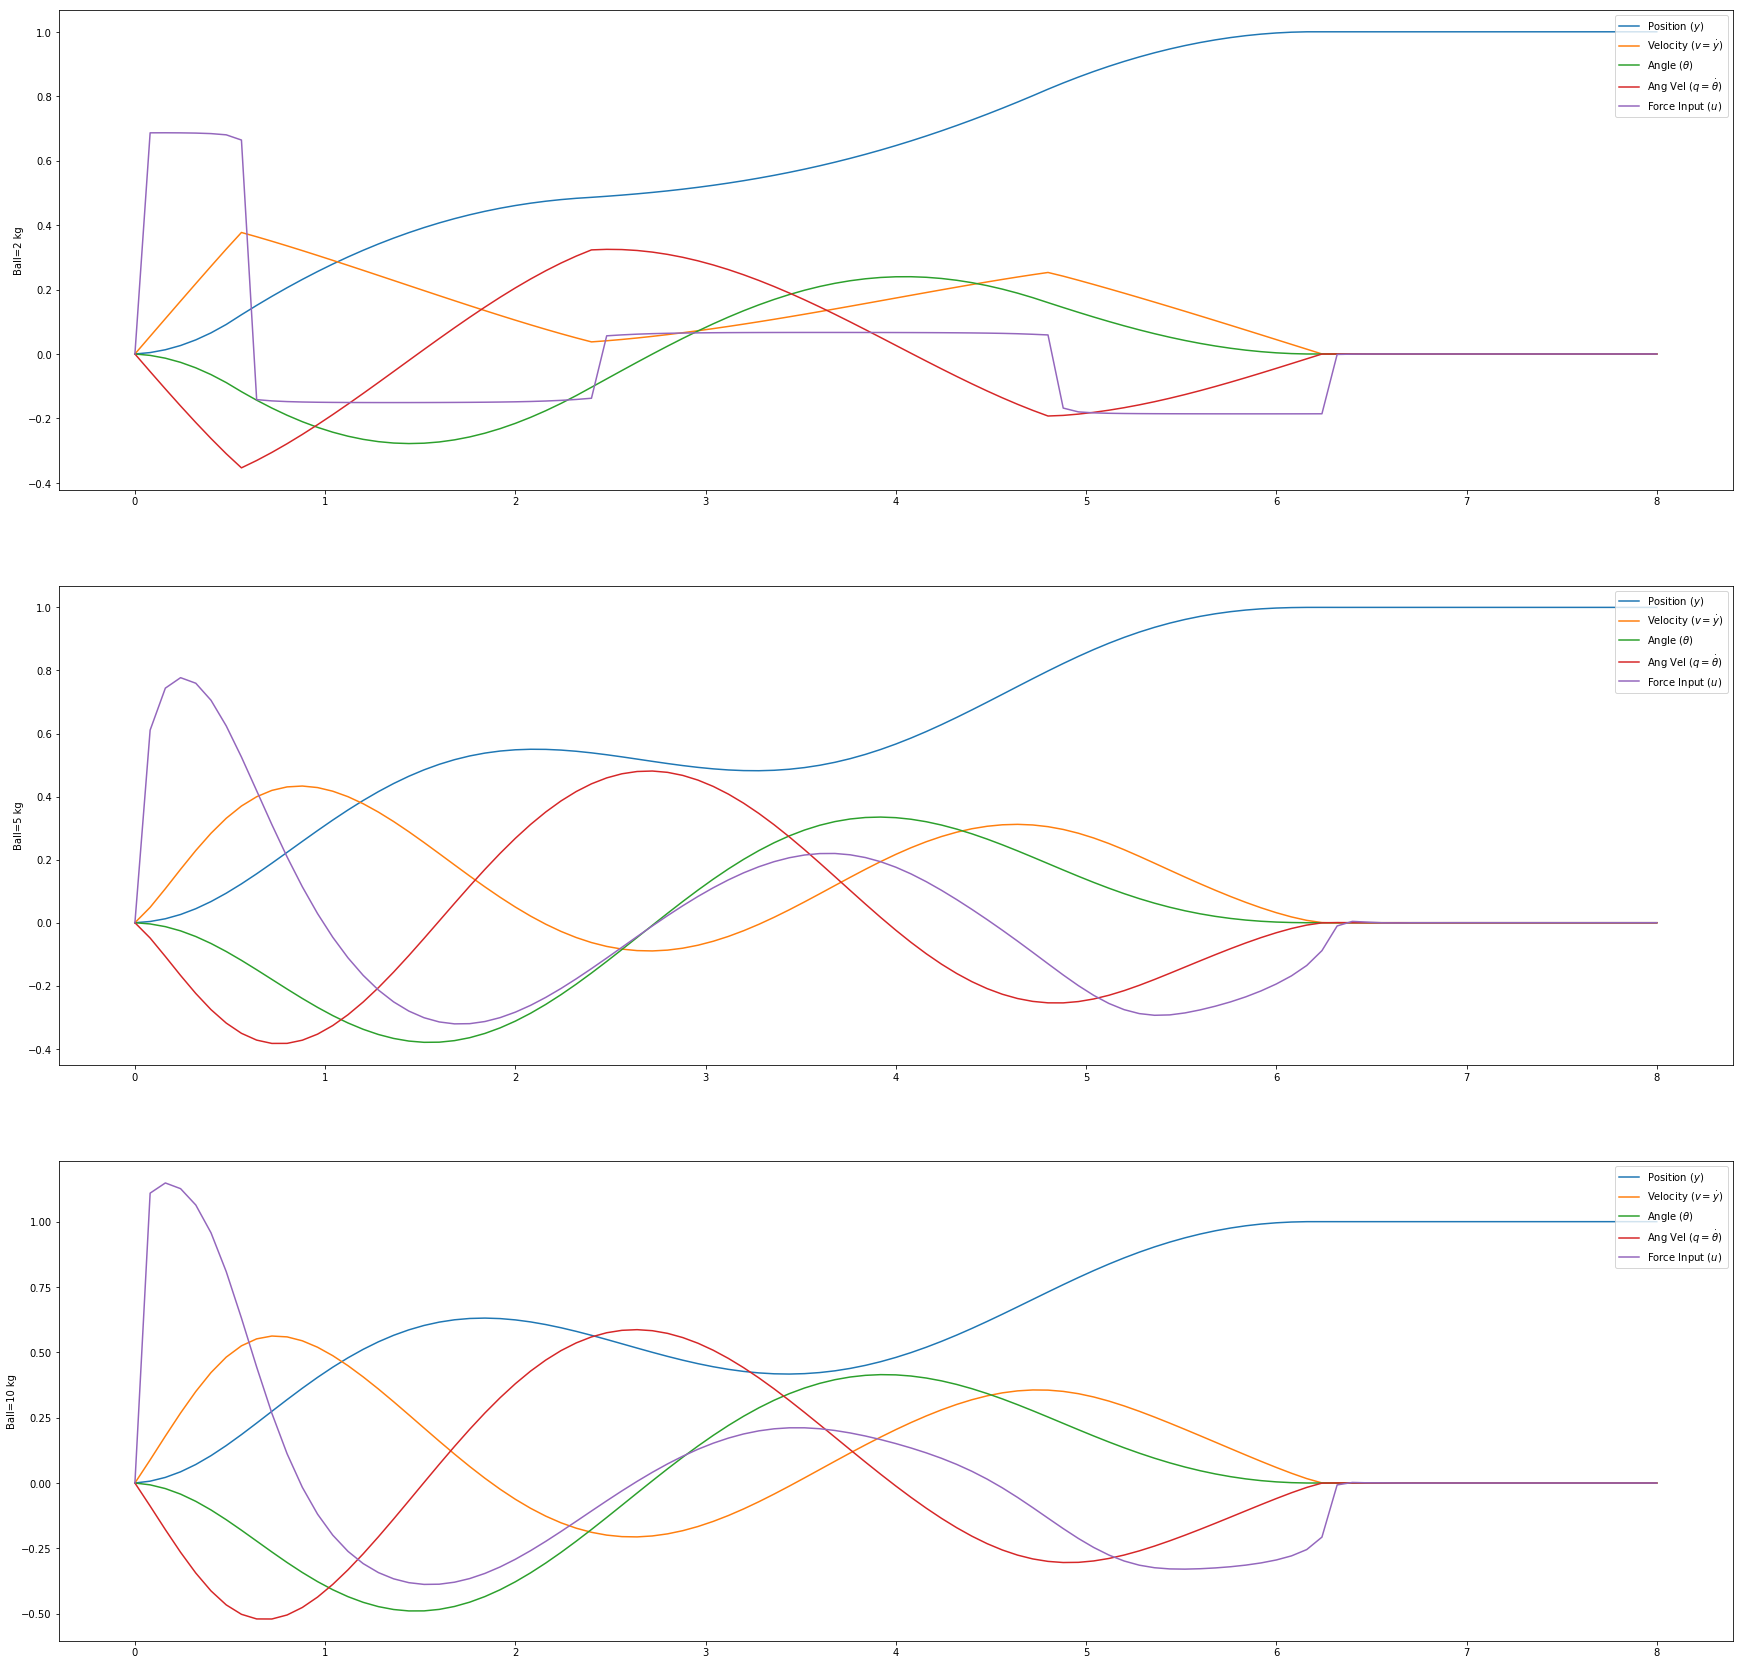

In [5]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

mass = [2,5,10]
nm = len(mass)
#plt.figure()
plt.figure(figsize=(20,35))

for j in range(len(mass)):
    m1 = 10
    m2 = mass[j]
    eps = m2/(m1+m2)
    A = np.array([[0,1,0,0],
                 [0,0,eps,0],
                 [0,0,0,1],
                 [0,0,-1,0]])
    B = np.array([[0],
                 [1],
                 [0],
                 [-1]])
    C = np.identity(4)

    m = GEKKO()
    x,y,u = m.state_space(A,B,C,D=None)
    m.time = np.linspace(0,8,101)
    fn = [0 if m.time[i]<6.2 else 1 for i in range(101)]      
    final = m.Param(value=fn)
    u[0].status = 1
    m.Obj(final * ((y[0]-1)**2 + y[1]**2 + y[2]**2 + y[3]**2))    
    m.options.IMODE = 6
    m.solve()

    plt.subplot(len(mass),1,j+1)
    plt.ylabel(f'Ball={mass[j]} kg')
    plt.plot(m.time,y[0], label = r"Position ($y$)")
    plt.plot(m.time,y[1], label = r"Velocity ($v=\dot y$)")
    plt.plot(m.time,y[2], label = r"Angle ($\theta$)")
    plt.plot(m.time,y[3], label = r"Ang Vel ($q=\dot \theta$)")
    plt.plot(m.time,u[0], label = r"Force Input ($u$)")
    plt.legend(loc=1)
plt.show()

apm 176.216.170.23_gk_model15 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 0.8.7
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            8
   Intermediates:            1
   Connections  :            0
   Equations    :           10
   Residuals    :            9
 
 Number of state variables:            891
 Number of total equations: -          792
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :             99
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ip

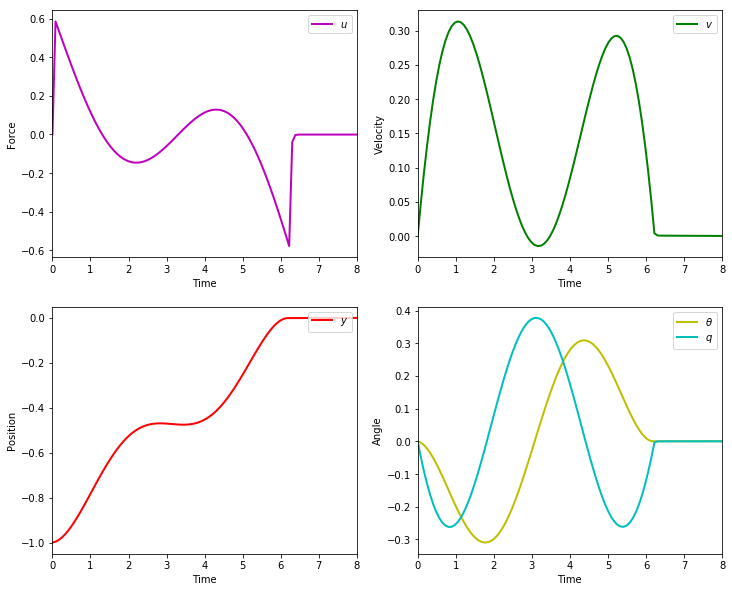

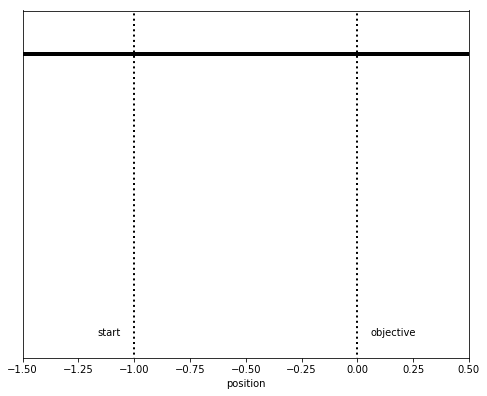

In [6]:
# Contributed by Everton Colling
import matplotlib.animation as animation
import numpy as np
from gekko import GEKKO
# requires ffmpeg to save mp4 file
#  available from https://ffmpeg.zeranoe.com/builds/
#  add ffmpeg.exe to path such as C:\ffmpeg\bin\ in
#  environment variables

#Defining a model
m = GEKKO()

#################################
#Weight of item
m2 = 5
#################################

#Defining the time, we will go beyond the 6.2s
#to check if the objective was achieved
m.time = np.linspace(0,8,100)

#Parameters
m1a = m.Param(value=10)
m2a = m.Param(value=m2)
final = np.zeros(len(m.time))
for i in range(len(m.time)):
    if m.time[i] < 6.2:
        final[i] = 0
    else:
        final[i] = 1
final = m.Param(value=final)

#MV
ua = m.Var(value=0)

#State Variables
theta_a = m.Var(value=0)
qa = m.Var(value=0)
ya = m.Var(value=-1)
va = m.Var(value=0)

#Intermediates
epsilon = m.Intermediate(m2a/(m1a+m2a))

#Defining the State Space Model
m.Equation(ya.dt() == va)
m.Equation(va.dt() == epsilon*theta_a + ua)
m.Equation(theta_a.dt() == qa)
m.Equation(qa.dt() == -theta_a -ua)

#Definine the Objectives
#Make all the state variables be zero at time >= 6.2
m.Obj(final*ya**2)
m.Obj(final*va**2)
m.Obj(final*theta_a**2)
m.Obj(final*qa**2)
#Try to minimize change of MV over all horizon
m.Obj(0.001*ua**2)

m.options.IMODE = 6 #MPC
m.solve() #(disp=False)

#Plotting the results
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))

plt.subplot(221)
plt.plot(m.time,ua.value,'m',lw=2)
plt.legend([r'$u$'],loc=1)
plt.ylabel('Force')
plt.xlabel('Time')
plt.xlim(m.time[0],m.time[-1])

plt.subplot(222)
plt.plot(m.time,va.value,'g',lw=2)
plt.legend([r'$v$'],loc=1)
plt.ylabel('Velocity')
plt.xlabel('Time')
plt.xlim(m.time[0],m.time[-1])

plt.subplot(223)
plt.plot(m.time,ya.value,'r',lw=2)
plt.legend([r'$y$'],loc=1)
plt.ylabel('Position')
plt.xlabel('Time')
plt.xlim(m.time[0],m.time[-1])

plt.subplot(224)
plt.plot(m.time,theta_a.value,'y',lw=2)
plt.plot(m.time,qa.value,'c',lw=2)
plt.legend([r'$\theta$',r'$q$'],loc=1)
plt.ylabel('Angle')
plt.xlabel('Time')
plt.xlim(m.time[0],m.time[-1])

plt.rcParams['animation.html'] = 'html5'

x1 = ya.value
y1 = np.zeros(len(m.time))

#suppose that l = 1
x2 = 1*np.sin(theta_a.value)+x1
x2b = 1.05*np.sin(theta_a.value)+x1
y2 = -1*np.cos(theta_a.value)+y1
y2b = -1.05*np.cos(theta_a.value)+y1

fig = plt.figure(figsize=(8,6.4))
ax = fig.add_subplot(111,autoscale_on=False,\
                     xlim=(-1.5,0.5),ylim=(-1.2,0.4))
ax.set_xlabel('position')
ax.get_yaxis().set_visible(False)

crane_rail, = ax.plot([-1.5,0.5],[0.2,0.2],'k-',lw=4)
start, = ax.plot([-1,-1],[-1.5,1],'k:',lw=2)
objective, = ax.plot([0,0],[-1.5,1],'k:',lw=2)
mass1, = ax.plot([],[],linestyle='None',marker='s',\
                 markersize=40,markeredgecolor='k',\
                 color='orange',markeredgewidth=2)
mass2, = ax.plot([],[],linestyle='None',marker='o',\
                 markersize=20,markeredgecolor='k',\
                 color='orange',markeredgewidth=2)
line, = ax.plot([],[],'o-',color='orange',lw=4,\
                markersize=6,markeredgecolor='k',\
                markerfacecolor='k')
time_template = 'time = %.1fs'
time_text = ax.text(0.05,0.9,'',transform=ax.transAxes)
start_text = ax.text(-1.06,-1.1,'start',ha='right')
end_text = ax.text(0.06,-1.1,'objective',ha='left')

def init():
    mass1.set_data([],[])
    mass2.set_data([],[])
    line.set_data([],[])
    time_text.set_text('')
    return line, mass1, mass2, time_text

def animate(i):
    mass1.set_data([x1[i]],[y1[i]+0.1])
    mass2.set_data([x2b[i]],[y2b[i]])
    line.set_data([x1[i],x2[i]],[y1[i],y2[i]])
    time_text.set_text(time_template % m.time[i])
    return line, mass1, mass2, time_text

ani_a = animation.FuncAnimation(fig, animate, \
         np.arange(1,len(m.time)), \
         interval=40,blit=False,init_func=init)

ani_a.save('OverheadCrane_Control.mp4',fps=30)

plt.show()